In [1]:
import numpy as np
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [2]:
dtc = DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=4)

In [3]:
data = load_iris()

In [4]:
x = data['data'][:,[1,2]]
y = data['target']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [6]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

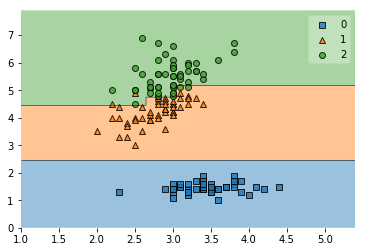

In [7]:
x_combined = np.vstack([x_train,x_test])
y_combined = np.hstack([y_train,y_test])
plot_decision_regions(x_combined,y_combined, clf = dtc)

In [8]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
data['feature_names'][1:3]

['sepal width (cm)', 'petal length (cm)']

In [10]:
from pydotplus import graph_from_dot_data
from sklearn.tree import  export_graphviz
from IPython.display import Image

In [11]:
dot_data = export_graphviz(dtc, filled=True,rounded=True,class_names=data['target_names'],
                           feature_names=data['feature_names'][1:3],out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('dtree.png')

True

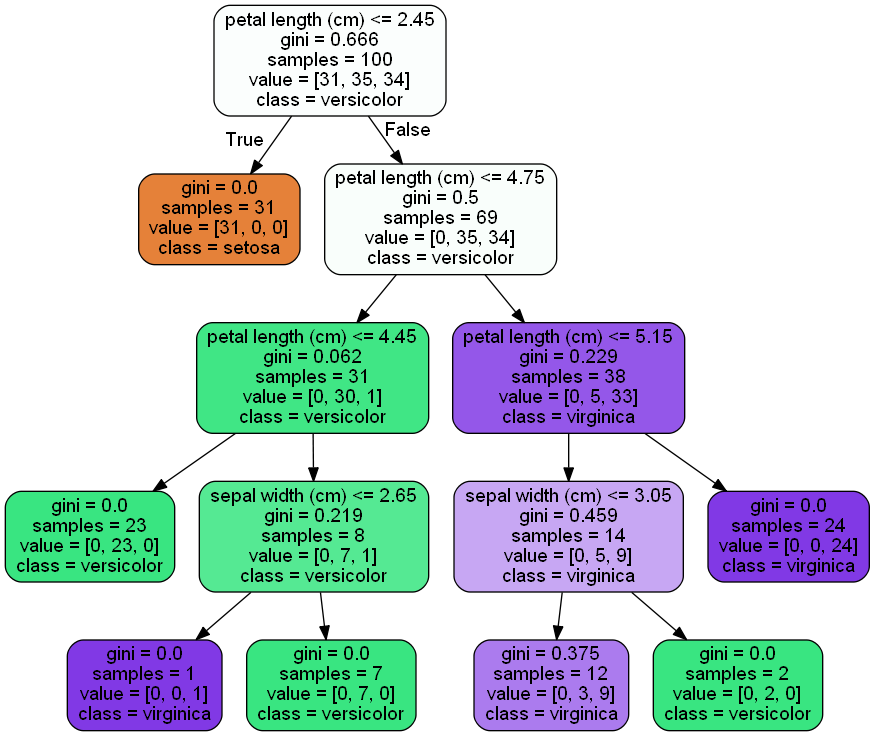

In [12]:
Image(filename='dtree.png',width=600)